# Utilities

## Libraries

In [13]:
#standad libraries
import numpy as np
import os

In [14]:
#data libraries
from make_dataset import DataGen
from sklearn.model_selection import train_test_split

In [15]:
# statisitcs libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
import warnings
warnings.filterwarnings('ignore')

## Dummy Data Generator

In [17]:
# dummy image generator for testing functionality
import pandas as pd
import os

img_labels = pd.read_csv('FoveaDetection/fovea_detection_data.csv')
dummy_image_path = 'dummy.jpg'

os.makedirs('dummy_data', exist_ok=True)
with open(dummy_image_path, 'rb') as dummy_file:
    dummy_content = dummy_file.read()

for img_name in img_labels['scan_name']:
    new_image_path = os.path.join('dummy_data', f'{img_name}')
    # Create a copy of the dummy image with the new name
    with open(new_image_path, 'wb') as new_file:
        new_file.write(dummy_content)

# Data

## Metadata

In [53]:
#scan information
data_scan = pd.read_csv('FoveaDetection/fovea_detection_data.csv')
data_scan.info()
data_scan.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21500 entries, 0 to 21499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   scan_name    21500 non-null  object
 1   scan_number  21500 non-null  int64 
 2   folder_name  21500 non-null  object
 3   patient_id   21500 non-null  int64 
 4   eye_side     21500 non-null  object
 5   status       21500 non-null  bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 861.0+ KB


,scan_name,scan_number,folder_name,patient_id,eye_side,status
0,064_OS_6_GA_6x6_SSOCT_1_168.jpg,168,064_OS_6_GA_6x6_SSOCT_1,64,left,False
1,064_OS_6_GA_6x6_SSOCT_1_202.jpg,202,064_OS_6_GA_6x6_SSOCT_1,64,left,True
2,064_OS_6_GA_6x6_SSOCT_1_397.jpg,397,064_OS_6_GA_6x6_SSOCT_1,64,left,False
3,064_OS_6_GA_6x6_SSOCT_1_204.jpg,204,064_OS_6_GA_6x6_SSOCT_1,64,left,True
4,064_OS_6_GA_6x6_SSOCT_1_44.jpg,44,064_OS_6_GA_6x6_SSOCT_1,64,left,False


## Scans

In [54]:
#images

#for MAC
# slices_path = r'/Volumes/fsmresfiles/Ophthalmology/Mirza_Images/AMD/dAMD_GA/all_slices_3'
# slices = os.listdir(slices_path)

# For windows
# slices_path = r'\\fsmresfiles.fsm.northwestern.edu\fsmresfiles\Ophthalmology\Mirza_Images\AMD\dAMD_GA\all_slices_3'
# slices = os.listdir(all_slices_path)

#for dummy functional testing
slices_path = r'dummy_data'
slices = os.listdir(slices_path)

scan_paths = [item for item in slices if item.endswith('.jpg')]
scan_paths[0:5]

['064_OS_4_GA_6x6_SSOCT_1_136.jpg',
 '064_OS_5_GA_6x6_SSOCT_1_421.jpg',
 '326_OD_3_GA_6x6_SSOCT_1_421.jpg',
 '064_OS_6_GA_6x6_SSOCT_1_236.jpg',
 '321_OS_1_GA_6x6_SSOCT_1_134.jpg']

## Model DataFrame

In [55]:
filtered_data = data_scan[data_scan['scan_name'].isin(scan_paths)]
filtered_data['label'] = filtered_data['status'].astype(int)

sorted_filtered_data = filtered_data.sort_values(by=['patient_id','scan_number'])
sorted_filtered_data.reset_index(inplace=True)


In [56]:
df = sorted_filtered_data[['patient_id', 'eye_side', 'scan_number', 'scan_name', 'status', 'label']]
df.head()

,patient_id,eye_side,scan_number,scan_name,status,label
0,47,left,1,047_OS_1_GA_6x6_SSOCT_1_1.jpg,False,0
1,47,left,1,047_OS_2_GA_6x6_SSOCT_1_1.jpg,False,0
2,47,left,2,047_OS_1_GA_6x6_SSOCT_1_2.jpg,False,0
3,47,left,2,047_OS_2_GA_6x6_SSOCT_1_2.jpg,False,0
4,47,left,3,047_OS_1_GA_6x6_SSOCT_1_3.jpg,False,0


# Statistics

## Frequency Distribution

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21500 entries, 0 to 21499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   patient_id   21500 non-null  int64 
 1   eye_side     21500 non-null  object
 2   scan_number  21500 non-null  int64 
 3   scan_name    21500 non-null  object
 4   status       21500 non-null  bool  
 5   label        21500 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 861.0+ KB


status
False    15004
True      6496
Name: count, dtype: int64


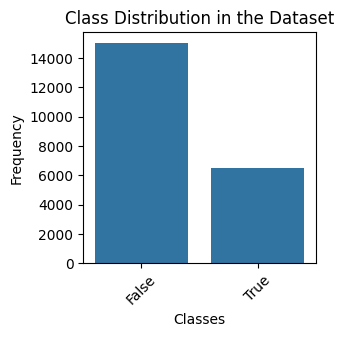

In [72]:
class_counts = df['status'].value_counts()
print(class_counts)
plt.figure(figsize=(3, 3))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution in the Dataset')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate labels if there are many classes
plt.show()

In [65]:
crosstab_1 = pd.crosstab(df['eye_side'], df['status'])
print(crosstab_1)

status    False  True 
eye_side              
left       6193   2807
right      8811   3689


In [58]:
pivot_table_eye_side = df.pivot_table(index='patient_id', columns='eye_side', values='scan_number', aggfunc='count', fill_value=0)
pivot_table_eye_side.columns = ['left_eye_scans', 'right_eye_scans']
pivot_table_eye_side['total_scans'] = pivot_table_eye_side['left_eye_scans'] + pivot_table_eye_side['right_eye_scans']
pivot_table_eye_side.reset_index(inplace=True)
print(pivot_table_eye_side)

   patient_id  left_eye_scans  right_eye_scans  total_scans
0          47            1000                0         1000
1          64            4000             7500        11500
2         190             500              500         1000
3         321             500              500         1000
4         326               0             1500         1500
5         341             500                0          500
6         345            1500             1500         3000
7         578            1000             1000         2000


In [66]:
pivot_table_status = df.pivot_table(index='patient_id', columns='status', values='scan_number', aggfunc='count', fill_value=0)
pivot_table_status.columns = ['False', 'True']
pivot_table_status.reset_index(inplace=True)
print(pivot_table_status)

   patient_id  False  True
0          47    667   333
1          64   7398  4102
2         190    715   285
3         321    874   126
4         326   1271   229
5         341    250   250
6         345   2181   819
7         578   1648   352


## Fovea Progression Visualization

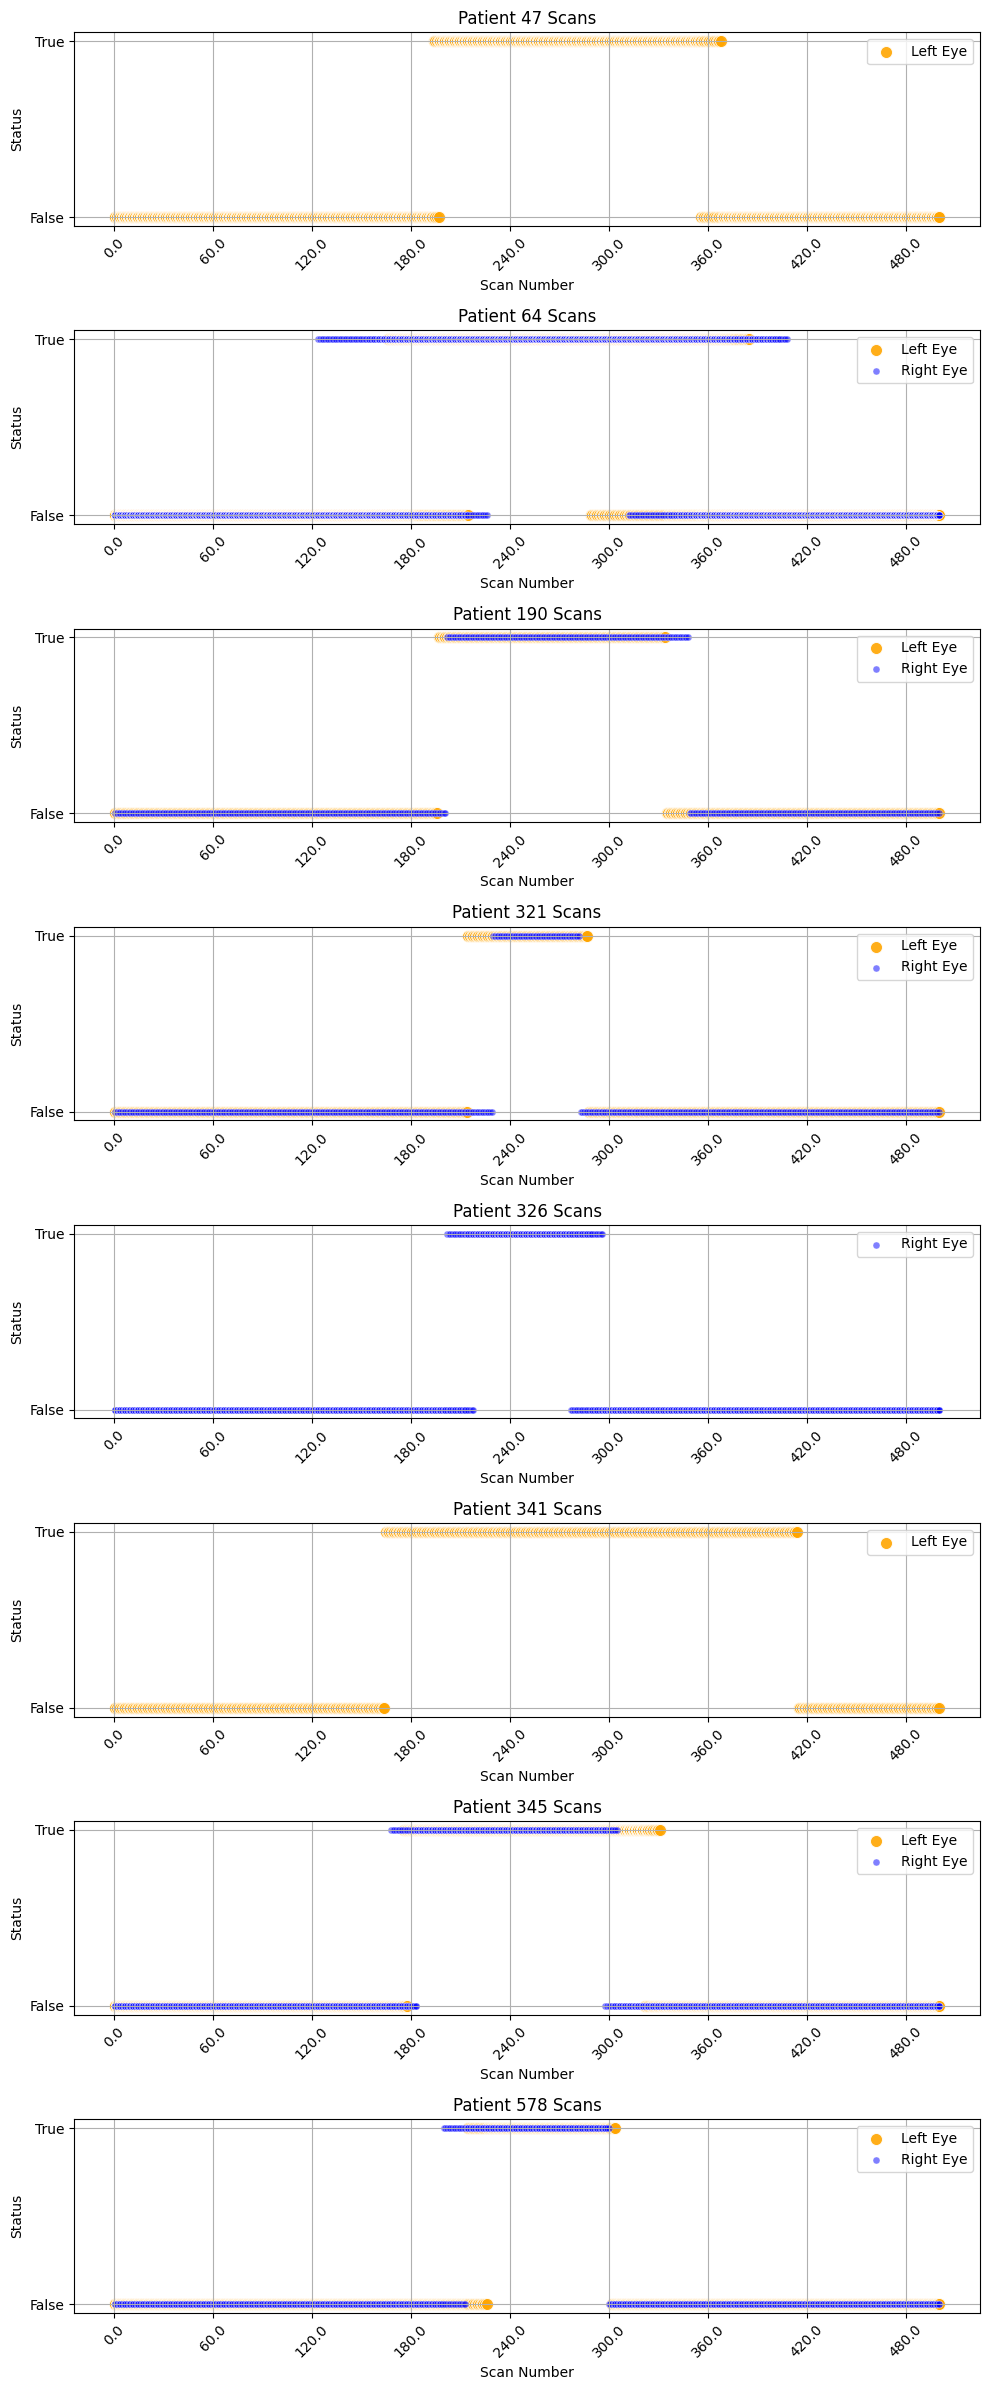

In [107]:
patients = df['patient_id'].unique()
fig, axes = plt.subplots(nrows=len(patients), figsize=(10, 3 * len(patients)), sharex=False)
if len(patients) == 1:
    axes = [axes]
for ax, patient in zip(axes, patients):
    patient_df = df[df['patient_id'] == patient]
    left_eye_df = patient_df[patient_df['eye_side'] == 'left']
    sns.scatterplot(data=left_eye_df, x='scan_number', y='status', ax=ax, 
                    color='orange', label='Left Eye', marker='o', s=75, alpha=0.9, edgecolor='white')
    right_eye_df = patient_df[patient_df['eye_side'] == 'right']
    sns.scatterplot(data=right_eye_df, x='scan_number', y='status', ax=ax,
                    color='blue', label='Right Eye', marker='o', s=25, alpha=0.5, edgecolor='white')
    ax.set_title(f'Patient {patient} Scans')
    ax.set_xlabel('Scan Number')
    ax.set_ylabel('Status')
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['False', 'True'])
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
    ax.grid(True) 
    ax.legend()

plt.tight_layout()
plt.show()

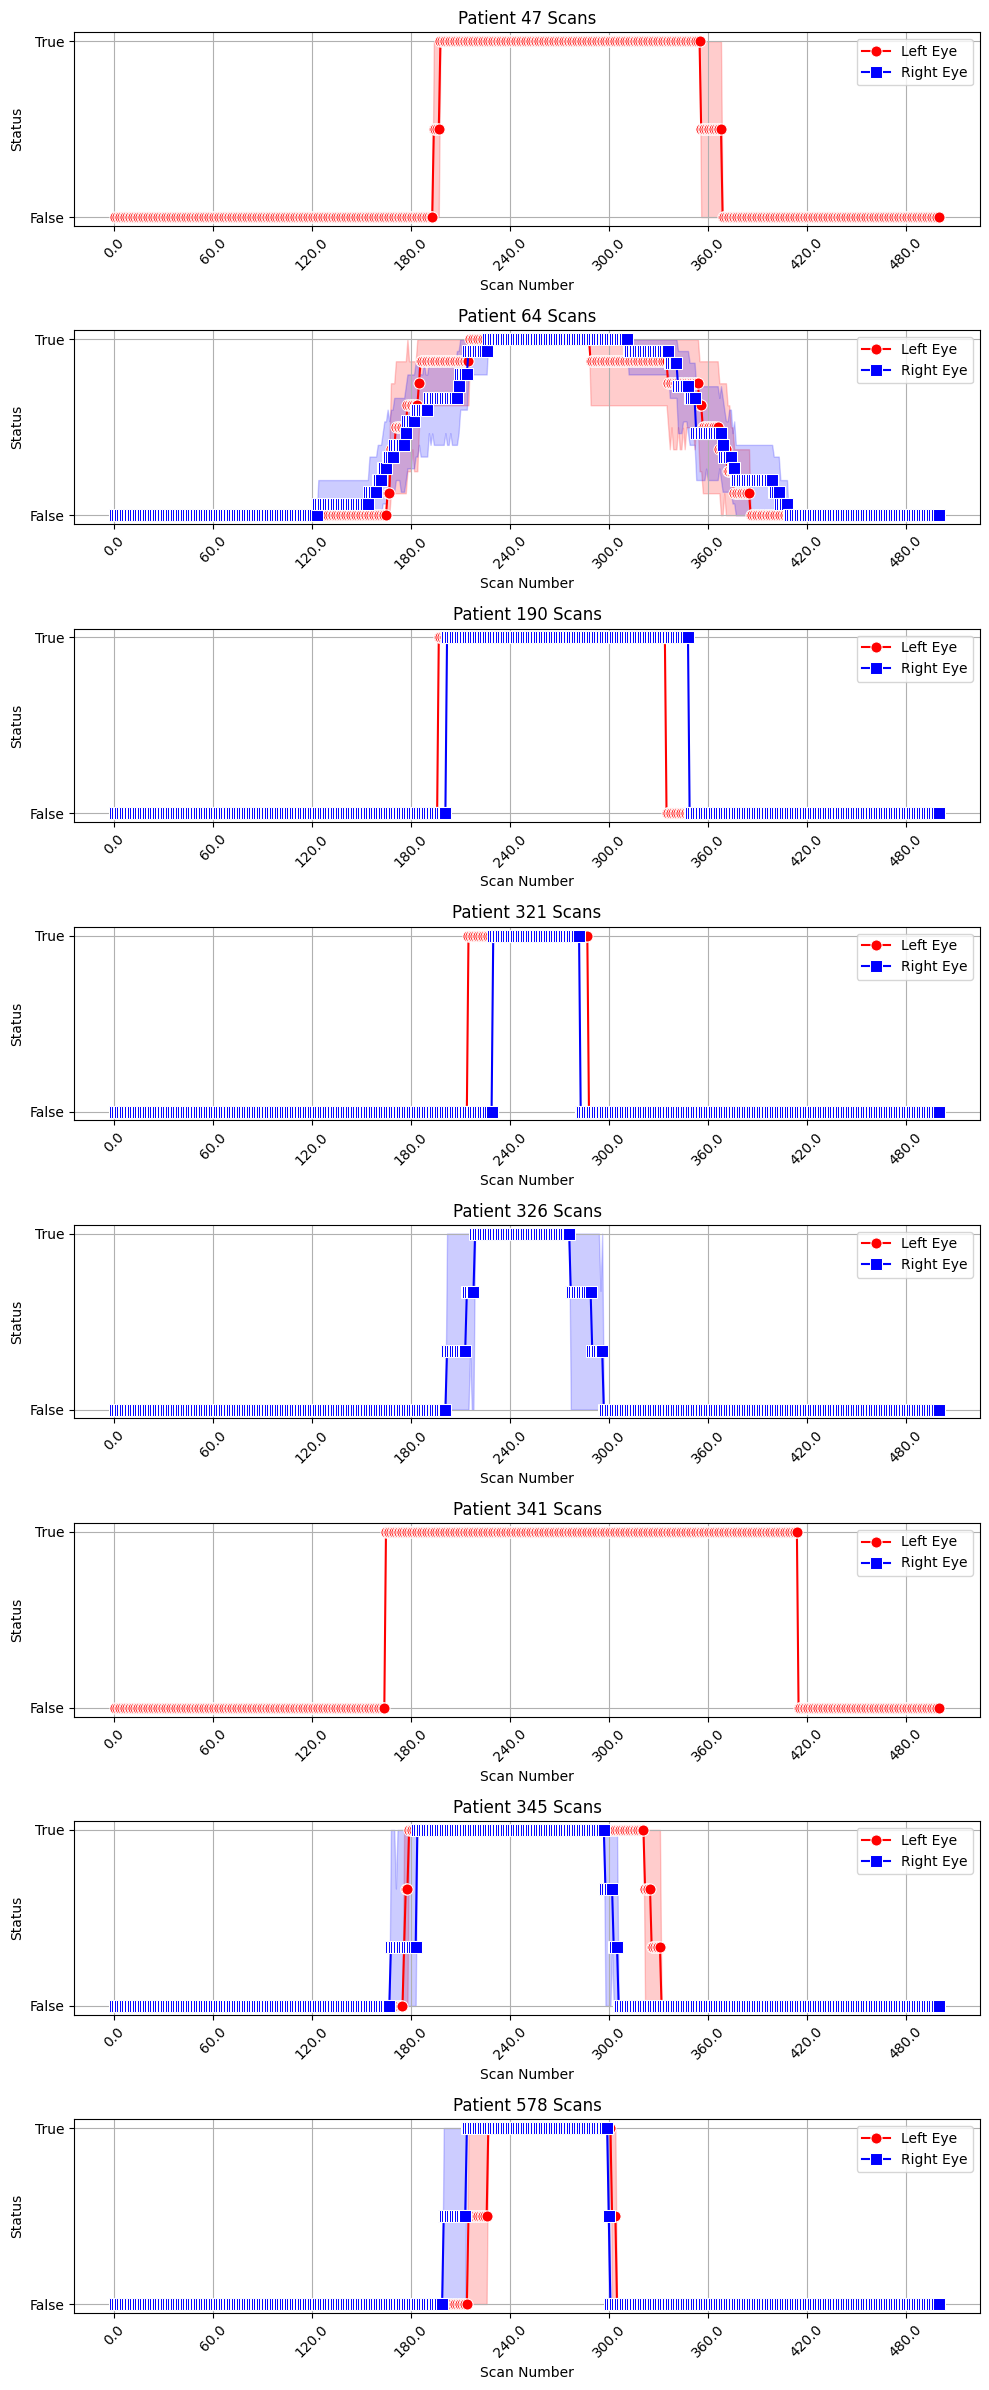

In [109]:
patients = df['patient_id'].unique()
fig, axes = plt.subplots(nrows=len(patients), figsize=(10, 3 * len(patients)), sharex=False)
if len(patients) == 1:
    axes = [axes]
for ax, patient in zip(axes, patients):
    patient_df = df[df['patient_id'] == patient]
    left_eye_df = patient_df[patient_df['eye_side'] == 'left'].sort_values('scan_number')
    sns.lineplot(data=left_eye_df, x='scan_number', y='status', ax=ax, 
                 color='red', label='Left Eye', marker='o', markersize=8)
    right_eye_df = patient_df[patient_df['eye_side'] == 'right'].sort_values('scan_number')
    sns.lineplot(data=right_eye_df, x='scan_number', y='status', ax=ax,
                 color='blue', label='Right Eye', marker='s', markersize=8)
    ax.set_title(f'Patient {patient} Scans')
    ax.set_xlabel('Scan Number')
    ax.set_ylabel('Status')
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['False', 'True'])
    ax.xaxis.set_major_locator(plt.MaxNLocator(10)) 
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
    ax.grid(True) 
    ax.legend()

plt.tight_layout()
plt.show()

# Function

### data_split(scan_metadata_path, slices_path) - > df, x_train, y_train, x_val, y_val, x_test, y_test